Question 1

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

np.random.seed(1)

list = [] # List of experimental theta values
avg = [] # List of MOving average for part 1c
for i in range(5000):
  list.append(max(0, 6*np.random.random() + 2 - 4))
  avg.append(mean(list))

print ('95% CI:', np.mean(list), "+/-",
       1.96*np.std(list, ddof = 1)/np.sqrt(5000))

95% CI: 1.3328728457484547 +/- 0.036893839228342606


Text(0.5, 1.0, 'Expected value of theta - Moving average')

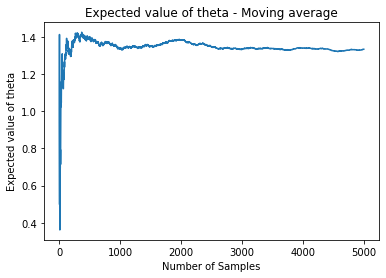

In [5]:
plt.plot(avg)
plt.xlabel("Number of Samples")
plt.ylabel("Expected value of theta")
plt.title("Expected value of theta - Moving average")

Question 2a - Generate one sample path of  T(S)  of the time to T = 1000 (Instead of time to failure)

Fail at 2
Clock, S, Repair, Fail
3.0 1 5.5 8.0
Fix at 1
Clock, S, Repair, Fail
5.5 2 inf 8.0
Fail at 2
Clock, S, Repair, Fail
8.0 1 10.5 9.0
Fail at 1
Clock, S, Repair, Fail
9.0 0 10.5 inf
Fix at 0
Clock, S, Repair, Fail
10.5 1 13.0 12.5
Fail at 1
Clock, S, Repair, Fail
12.5 0 13.0 inf
Fix at 0
Clock, S, Repair, Fail
13.0 1 15.5 14.0
Fail at 1
Clock, S, Repair, Fail
14.0 0 15.5 inf
Fix at 0
Clock, S, Repair, Fail
15.5 1 18.0 16.5
Fail at 1
Clock, S, Repair, Fail
16.5 0 18.0 inf
Fix at 0
Clock, S, Repair, Fail
18.0 1 20.5 20.0
Fail at 1
Clock, S, Repair, Fail
20.0 0 20.5 inf
Fix at 0
Clock, S, Repair, Fail
20.5 1 23.0 23.5
Fix at 1
Clock, S, Repair, Fail
23.0 2 inf 23.5
Fail at 2
Clock, S, Repair, Fail
23.5 1 26.0 26.5
Fix at 1
Clock, S, Repair, Fail
26.0 2 inf 26.5
Fail at 2
Clock, S, Repair, Fail
26.5 1 29.0 30.5
Fix at 1
Clock, S, Repair, Fail
29.0 2 inf 30.5
Fail at 2
Clock, S, Repair, Fail
30.5 1 33.0 33.5
Fix at 1
Clock, S, Repair, Fail
33.0 2 inf 33.5
Fail at 2
Clock, S, Repair, 

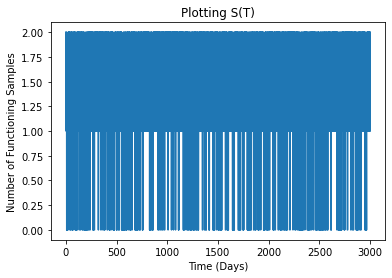

Average number of working components is: 1.2695


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# start with 2 functioning components at time 0
clock = 0
S = 2
T=3000 # For 1000 days

# fix random number seed
np.random.seed(1)

# initialize the time of events
NextRepair = float('inf')
NextFailure = np.ceil(6*np.random.random())
# lists to keep the event times and the states
EventTimes = [0]
States = [2]
# Define variables to keep the area under the sample path
# and the time and state of the last event
Area = 0.0
Tlast = 0
Slast = 2

while clock < T: # While the time is less than 1000, we count the number of functioning samples
    # advance the time
    clock = min(NextRepair, NextFailure)
    
    # For these eqns, the latter state is being calculated
    if NextRepair <= NextFailure and S==1: #Going from State 1 to State 2 (Repair)
        # next event is completion of a repair
        S = S + 1
        NextRepair = float('inf') # No more awaiting repair times
        print('Fix at 1') # Sanity check
    elif S==0: # Going from State 0 to State 1 (System failed to operating)
      NextRepair = clock + 2.5 # component repaired, immediately start another repair
      S = S+1
      NextFailure = clock + np.ceil(6*np.random.random())
      print('Fix at 0') # Sanity check
    elif S==2: # Going from State 2 to State 1 (component fail)
      S = S - 1
      NextFailure = clock + np.ceil(6*np.random.random())
      NextRepair = clock + 2.5 # component failed, immediately start repair
      print('Fail at 2') # Sanity check

    else: # S=1, going from state 1 to 0 (System failed)
      # next event is a failure
      S = S - 1
      NextFailure = float('inf') # Cannot fail anymore, waiting repairs
      print('Fail at 1') # Sanity check

    # Calculating the area under the line
    Area = Area + (clock - Tlast)* Slast
    Tlast = clock
    Slast = S
    print("Clock, S, Repair, Fail")
    print(clock, S, NextRepair, NextFailure)
    
    # save the time and state
    EventTimes.append(clock)
    States.append(S)

# plot the sample path
print ('End time was:', clock)
plt.plot(EventTimes, States, drawstyle = 'steps-post')
plt.xlabel('Time (Days)')
plt.ylabel('Number of Functioning Samples')
plt.title('Plotting S(T)')
plt.show()
# Need to take account when the clock passes T=1000 by subtracting the area that is beyond T=1000
print('Average number of working components is:', (Area - (clock - T)*Slast)/T) 

Average Functioning Components at Time 1000: 1.2635

Average Functioning Components at Time 3000: 1.2695

Question 2b - Determining availability

End time was: 1001.0


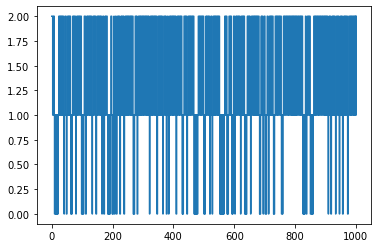

Average number of working components is: 1.2635
Availability is: 90.35


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# start with 2 functioning components at time 0
clock = 0
S = 2
T=1000 # Until Day 1000

# fix random number seed
np.random.seed(1)

# initialize the time of events
NextRepair = float('inf')
NextFailure = np.ceil(6*np.random.random())
# lists to keep the event times and the states
EventTimes = [0]
States = [2]
# Define variables to keep the area under the sample path
# and the time and state of the last event
up = 0
Area = 0.0
Tlast = 0
Slast = 2

while clock < T:
    # advance the time
    clock = min(NextRepair, NextFailure)
    
    if NextRepair <= NextFailure and S==1: #State 2
        # next event is completion of a repair
        S = S + 1
        NextRepair = float('inf') #Check
    elif S==0: #State 1
      NextRepair = clock + 2.5
      S = S+1
      NextFailure = clock + np.ceil(6*np.random.random())
    elif S==2: #State 1
      S = S - 1
      NextFailure = clock + np.ceil(6*np.random.random())
      NextRepair = clock + 2.5

    else: #S= 1
      # next event is a failure
      S = S - 1
      NextFailure = float('inf') #Check

    # Availability, the rest of the code is the same as 2a
    up = up + (clock - Tlast)*min(Slast, 1) # If it's state 1 or 2, it will  be equal to 1

    Area = Area + (clock - Tlast)* Slast
    Tlast = clock
    Slast = S
    
    # save the time and state
    EventTimes.append(clock)
    States.append(S)

# plot the sample path
print ('End time was:', clock)
plt.plot(EventTimes, States, drawstyle = 'steps-post')
plt.show()
print('Average number of working components is:', (Area - (clock - T)*Slast)/T)
print('Availability is:', (up - (clock - T)*min(Slast,1))/T * 100)

Availability at Day 1000: 90.35

Availability at Day 3000: 91.36666

Question 3 - Run multiple replications and estimate the time to failure based off multiple spares

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Set number of replications
R = 1000
# Define lists to keep samples of the outputs across replications
TTF_list = []
Ave_list = []

# fix random number seed
np.random.seed(1)

for rep in range (0,R): # Number of replication loops
    # start with N functioning components at time 0
    clock = 0
    N = 4 # Variable number of total components (Replace with 2, 3, 4)
    S= N
    # initialize the time of events
    NextRepair = float('inf')
    NextFailure = np.ceil(6*np.random.random())
    EventTimes = [0]
    States = [S]
    # Define variables to keep the area under the sample path
    # and the time and state of the last event
    Area = 0.0
    Tlast = 0
    Slast = S

    while S > 0: # Time to failure, system is still functioning
        # advance the time
        clock = min(NextRepair, NextFailure)

        if NextRepair <= NextFailure and S == (N - 1): # Going from N-1 to N, a repair
            # next event is completion of a repair
            S = S + 1
            NextRepair = float('inf')
        elif NextRepair <= NextFailure: # A repair (If repair = failure time, will repair first.)
        # This assumptions increases our expected time to failure
          # next event is completion of a repair
            S = S + 1
            NextRepair = NextRepair + 2.5
        elif S==N: # Going from N to N-1, next event is a failure
            S = S - 1
            NextFailure = clock + np.ceil(6*np.random.random())
            NextRepair = clock + 2.5
        else: # next event is a failure
            S = S - 1
            NextFailure = clock + np.ceil(6*np.random.random())
         # Update the area under the sample path and the
        # time and state of the last event
        Area = Area + (clock - Tlast)* Slast
        Tlast = clock
        Slast = S

    # save the TTF and average # of func. components
    TTF_list.append(clock)
    Ave_list.append(Area/clock)

print('Estimated expected TTF:', np.mean(TTF_list))
print('Estimated expected ave. # of func. comp. till failure:', np.mean(Ave_list))

print ('95% CI for TTF:', np.mean(TTF_list), "+/-",
       1.96*np.std(TTF_list, ddof = 1)/np.sqrt(R))
print ('95% CI for ave. # of func. comp.:', np.mean(Ave_list), "+/-",
       1.96*np.std(Ave_list, ddof = 1)/np.sqrt(R))

Estimated expected TTF: 990.0
Estimated expected ave. # of func. comp. till failure: 3.09325530496805
95% CI for TTF: 990.0 +/- 61.72667191920702
95% CI for ave. # of func. comp.: 3.09325530496805 +/- 0.007057533818077841


N=2:

Estimated expected TTF: 14.193

Estimated expected ave. # of func. comp. till failure: 1.5585877994579558

95% CI for TTF: 14.193 +/- 0.7212458114694061

95% CI for ave. # of func. comp.: 1.5585877994579558 +/- 0.008130579538131004

N = 3:

Estimated expected TTF: 110.959

Estimated expected ave. # of func. comp. till failure: 2.239361844747321

95% CI for TTF: 110.959 +/- 7.058870779760439

95% CI for ave. # of func. comp.: 2.239361844747321 +/- 0.0084373435720208

N=4:

Estimated expected TTF: 990.0

Estimated expected ave. # of func. comp. till failure: 3.09325530496805

95% CI for TTF: 990.0 +/- 61.72667191920702

95% CI for ave. # of func. comp.: 3.09325530496805 +/- 0.007057533818077841

Question 5 - X-bar averages and histograms

Average of X1 for 1000 samples is:  0.5006045994559052
Average of X2 for 1000 samples is:  0.49988185940024554
Average of X30 for 1000 samples is:  0.49998149024809174
Average of X500 for 1000 samples is:  0.49963423283601344


(array([  8.,  26.,  85., 140., 209., 225., 176.,  89.,  32.,  10.]),
 array([0.45951331, 0.4673511 , 0.47518889, 0.48302668, 0.49086448,
        0.49870227, 0.50654006, 0.51437785, 0.52221565, 0.53005344,
        0.53789123]),
 <a list of 10 Patch objects>)

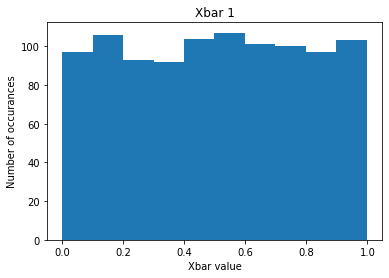

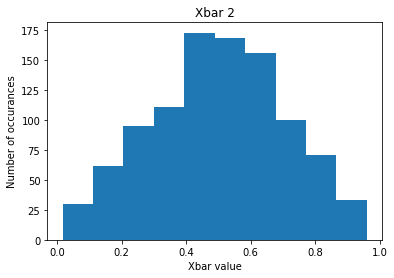

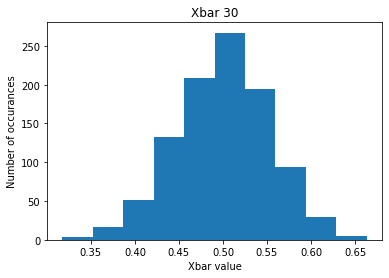

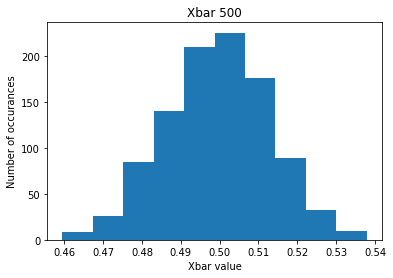

In [26]:
np.random.seed(1)
avg = []
k = 1
i = 1
while i <= 1000:
  avg.append(np.random.random())
  i = i+1 # No for loop, only 1 sample
print('Average of X1 for 1000 samples is: ', np.mean(avg))
plt.figure(0)
plt.xlabel('Xbar value')
plt.ylabel('Number of occurances')
plt.title('Xbar 1')
plt.hist(avg)

list = []
avg = []
i=1
k = 2
while i <= 1000:
  sum = 0
  for x in range(k): # For loop, average of 2 samples per replication
    sum = sum + np.random.random() # Sum of all X's

  avg.append(sum /k) # Average of X's to get Xbar-i
  i = i+1
print('Average of X2 for 1000 samples is: ', np.mean(avg))
plt.figure(1)
plt.xlabel('Xbar value')
plt.ylabel('Number of occurances')
plt.title('Xbar 2')
plt.hist(avg)

list = []
avg = []
i=1
k = 30
while i <= 1000:
  sum = 0
  for x in range(k): # For loop, average of 30 samples per replication
    sum = sum + np.random.random() # Sum of all X's

  avg.append(sum /k) # Average of X's to get Xbar-i
  i = i+1
print('Average of X30 for 1000 samples is: ', np.mean(avg))
plt.figure(3)
plt.xlabel('Xbar value')
plt.ylabel('Number of occurances')
plt.title('Xbar 30')
plt.hist(avg)

list = []
avg = []
i=1
k = 500
while i <= 1000:
  sum = 0
  for x in range(k): # For loop, average of 500 samples per replication
    sum = sum + np.random.random() # Sum of all X's

  avg.append(sum /k) # Average of X's to get Xbar-i
  i = i+1
print('Average of X500 for 1000 samples is: ', np.mean(avg))
plt.figure(4)
plt.xlabel('Xbar value')
plt.ylabel('Number of occurances')
plt.title('Xbar 500')
plt.hist(avg)


As n increases, the mean converges to 0.50 and the variability shrinks (we see that the horizontal scale is shrinking)